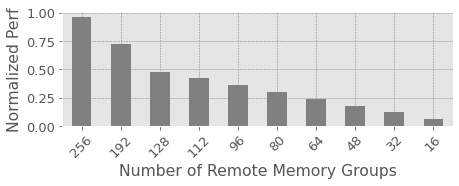

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 13})

values = [0.96, 0.72, 0.48, 0.42, 0.36, 0.30, 0.24, 0.18, 0.12, 0.06]
index = [256, 192, 128, 112, 96, 80, 64, 48, 32, 16]
df = pd.DataFrame({'v1': values}, index=index)

ax = df.plot.bar(rot=0, figsize=(7, 2.1), color="gray")
ax.get_legend().remove()

plt.xlabel("Number of Remote Memory Groups")
plt.ylabel("Normalized Perf")
plt.xticks(rotation = 45)
plt.yticks(np.arange(0, max(values)+.1, 0.25))
plt.grid(color="gray", linestyle='--', linewidth=0.5)

fig = ax.get_figure()
fig.savefig("case_study_disagg_mem_norm_perf_num_remote_memory_groups.pdf", bbox_inches='tight')

Time                          Compute Time   Exp. Comm  Exp. Idle  \
DAG Memory Pool Architecture                                        
    ZeRO-Infinity                 73959183  2604716439        385   
    HierMem (baseline)            73959183  2652116434        385   
    HierMem (opt)                 73959183   515558924        314   

Time                          Exp. Local Mem  Exp. Remote Mem  
DAG Memory Pool Architecture                                   
    ZeRO-Infinity                          0         94493900  
    HierMem (baseline)                     0        144976064  
    HierMem (opt)                          0          8113231

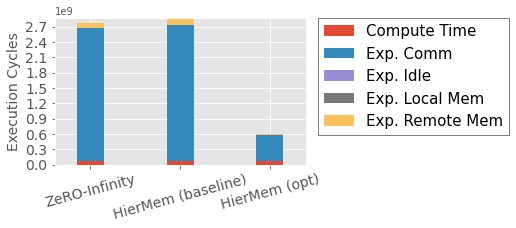

In [18]:
# Data and imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib
plt.rcParams.update({'font.size': 15})

matplotlib.style.use('ggplot')

randd = [
    ["", "ZeRO-Infinity", "Compute Time", 73959183],
    ["", "ZeRO-Infinity", "Exp. Local Mem", 0],
    ["", "ZeRO-Infinity", "Exp. Remote Mem", 94493900],
    ["", "ZeRO-Infinity", "Exp. Comm", 2604716439],
    ["", "ZeRO-Infinity", "Exp. Idle", 385],
    ["", "HierMem (baseline)", "Compute Time", 73959183],
    ["", "HierMem (baseline)", "Exp. Local Mem", 0],
    ["", "HierMem (baseline)", "Exp. Remote Mem", 144976064],
    ["", "HierMem (baseline)", "Exp. Comm", 2652116434],
    ["", "HierMem (baseline)", "Exp. Idle", 385],
    ["", "HierMem (opt)", "Compute Time", 73959183],
    ["", "HierMem (opt)", "Exp. Local Mem", 0],
    ["", "HierMem (opt)", "Exp. Remote Mem", 8113231],
    ["", "HierMem (opt)", "Exp. Comm", 515558924],
    ["", "HierMem (opt)", "Exp. Idle", 314],
]
custom_dict = {'ZeRO-Infinity': 0, 'HierMem (baseline)': 1, 'HierMem (opt)': 2}
df = pd.DataFrame(
    randd,
    columns=["DAG", "Memory Pool Architecture", "Time", "Count"])
df = df.groupby(["DAG", "Memory Pool Architecture", "Time"])["Count"].sum().unstack(fill_value=0)
df = df.sort_values(by=['Memory Pool Architecture'], key=lambda x: x.map(custom_dict))
display(df)

# plotting

clusters = df.index.levels[0]
inter_graph = 0
maxi = np.max(np.sum(df, axis=1))
total_width = len(df)+inter_graph*(len(clusters)-1)

fig = plt.figure(figsize=(4.5,2.7))
gridspec.GridSpec(1, total_width)
axes=[]

ax_position = 0
for cluster in clusters:
    subset = df.loc[cluster]
    ax = subset.plot(kind="bar", stacked=True, width=0.3, ax=plt.subplot2grid((1,total_width), (0,ax_position), colspan=len(subset.index)), fontsize=14, rot=15)
    axes.append(ax)
    ax.set_xlabel("")
    ax.set_ylim(0,maxi+1)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax_position += len(subset.index)+inter_graph

for i in range(1,len(clusters)):
    axes[i].set_yticklabels("")
    axes[i-1].legend().set_visible(False)
axes[0].set_ylabel("Execution Cycles", fontsize=14)

legend = axes[-1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15, framealpha=1, borderaxespad=0, fancybox=False).get_frame()
legend.set_facecolor("white")
legend.set_edgecolor("black")

plt.show()
fig.savefig("execution_time_breakdown_comparison.pdf", bbox_inches='tight')